In [99]:
#Import libraries
import pandas as pd
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
import yfinance as yf
from datetime import datetime
sns.set_style('whitegrid')
plt.style.use("bmh")
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [100]:
#list of comapanies included
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
#setting daytime
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)
for stock in tech_list:
    globals()[stock]=yf.download(stock,start,end)
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df= pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-01-06 00:00:00-05:00,83.029999,86.400002,81.430000,86.080002,86.080002,83219100,AMAZON
2023-01-09 00:00:00-05:00,87.459999,89.480003,87.080002,87.360001,87.360001,65266100,AMAZON
2023-01-10 00:00:00-05:00,87.570000,90.190002,87.290001,89.870003,89.870003,67756600,AMAZON
2023-01-11 00:00:00-05:00,90.930000,95.260002,90.930000,95.089996,95.089996,103126200,AMAZON
2023-01-12 00:00:00-05:00,96.930000,97.190002,93.500000,95.269997,95.269997,85254800,AMAZON
2023-01-13 00:00:00-05:00,94.180000,98.370003,94.120003,98.120003,98.120003,85413600,AMAZON
2023-01-17 00:00:00-05:00,98.680000,98.889999,95.730003,96.050003,96.050003,72755000,AMAZON
2023-01-18 00:00:00-05:00,97.250000,99.320000,95.379997,95.459999,95.459999,79570400,AMAZON
2023-01-19 00:00:00-05:00,94.739998,95.440002,92.860001,93.680000,93.680000,69002700,AMAZON


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1004 entries, 2022-01-21 00:00:00-05:00 to 2023-01-20 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1004 non-null   float64
 1   High          1004 non-null   float64
 2   Low           1004 non-null   float64
 3   Close         1004 non-null   float64
 4   Adj Close     1004 non-null   float64
 5   Volume        1004 non-null   int64  
 6   company_name  1004 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 62.8+ KB


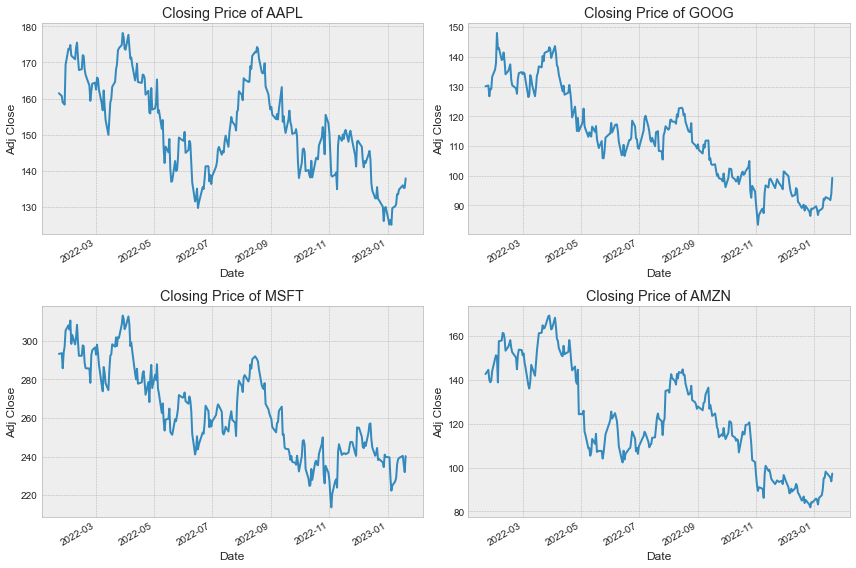

In [102]:
#Plot stock price of 4 companies
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
for i in range (1,len(company_name)+1):
    plt.subplot(2,2,i)
    df[df['company_name']==company_name[i-1]]['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.title(f"Closing Price of {tech_list[i-1]}")
plt.tight_layout()

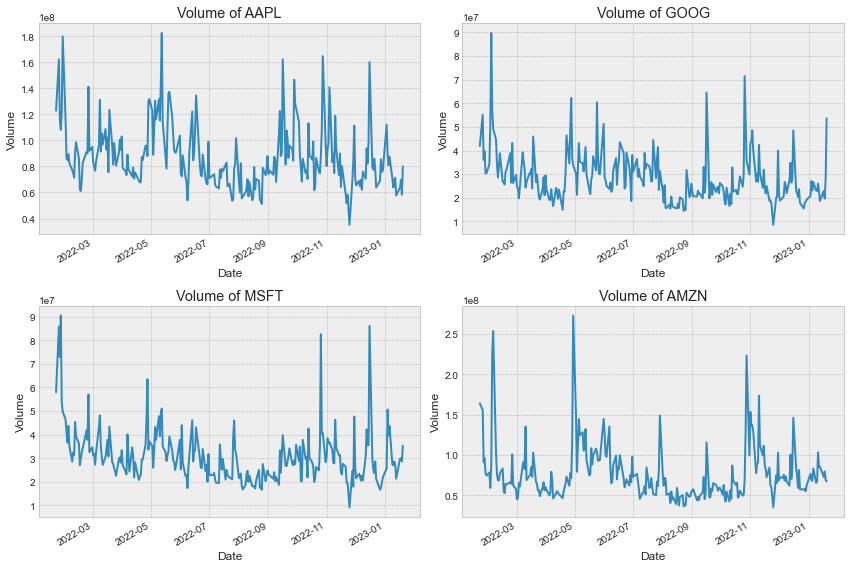

In [103]:
#Plot volumes of 4 companies
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
for i in range (1,len(company_name)+1):
    plt.subplot(2,2,i)
    df[df['company_name']==company_name[i-1]]['Volume'].plot()
    plt.ylabel('Volume')
    plt.title(f"Volume of {tech_list[i-1]}")
plt.tight_layout()

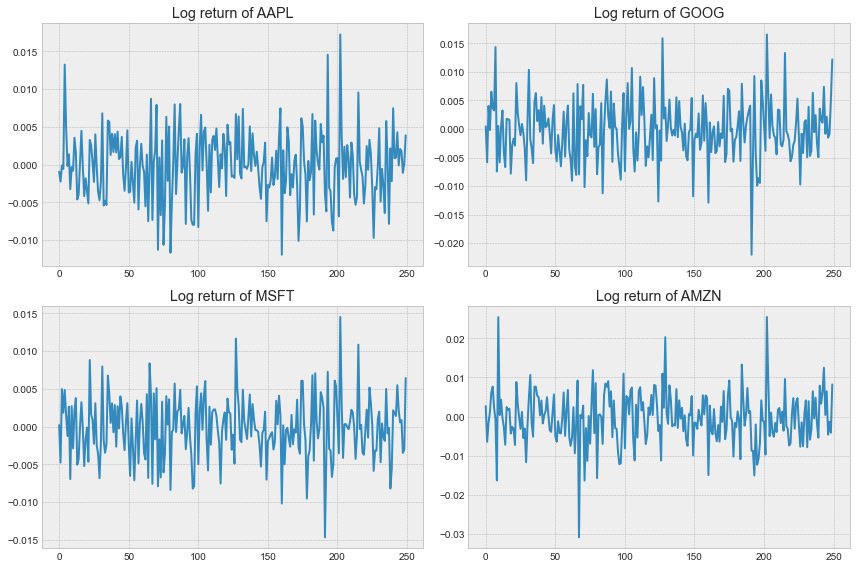

In [104]:
#Create log return data function
def log_return(data):
    return np.diff(np.log(data))
# Log return
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
for i in range (1,len(company_name)+1):
    plt.subplot(2,2,i)
    plt.plot(log_return(np.log(df[df['company_name']==company_name[i-1]]['Adj Close'])))
    plt.title(f"Log return of {tech_list[i-1]}")
plt.tight_layout()

In [105]:
#Create Value at Risk function
def VaR_log_normal(s,alpha):
    X= np.diff(np.log(s))
    ev=np.mean(X)
    std_dev= np.sqrt(np.var(X))
    VaR = s[-1]*(1-np.exp(ev+std_dev*scipy.stats.norm.ppf(1-alpha)))
    return VaR
#Apple
print("Value at Risk of Apple Stock with 90% confidence interval: ",VaR_log_normal(AAPL['Adj Close'],0.9))
print("Value at Risk of Apple Stock with 95% confidence interval: ",VaR_log_normal(AAPL['Adj Close'],0.95))
print("Value at Risk of Apple Stock with 99% confidence interval: ",VaR_log_normal(AAPL['Adj Close'],0.99))
#Google
print("Value at Risk of Google Stock with 90% confidence interval: ",VaR_log_normal(GOOG['Adj Close'],0.9))
print("Value at Risk of Google Stock with 95% confidence interval: ",VaR_log_normal(GOOG['Adj Close'],0.95))
print("Value at Risk of Google Stock with 99% confidence interval: ",VaR_log_normal(GOOG['Adj Close'],0.99))
#Microsoft
print("Value at Risk of Microsoft Stock with 90% confidence interval: ",VaR_log_normal(MSFT['Adj Close'],0.9))
print("Value at Risk of Microsoft Stock with 95% confidence interval: ",VaR_log_normal(MSFT['Adj Close'],0.95))
print("Value at Risk of Microsoft Stock with 99% confidence interval: ",VaR_log_normal(MSFT['Adj Close'],0.99))
#Amazon
print("Value at Risk of Amazon Stock with 90% confidence interval: ",VaR_log_normal(AMZN['Adj Close'],0.9))
print("Value at Risk of Amazon Stock with 95% confidence interval: ",VaR_log_normal(AMZN['Adj Close'],0.95))
print("Value at Risk of Amazon Stock with 99% confidence interval: ",VaR_log_normal(AMZN['Adj Close'],0.99))


Value at Risk of Apple Stock with 90% confidence interval:  4.00572683157829
Value at Risk of Apple Stock with 95% confidence interval:  5.096182824776267
Value at Risk of Apple Stock with 99% confidence interval:  7.117794302041526
Value at Risk of Google Stock with 90% confidence interval:  3.18537738153927
Value at Risk of Google Stock with 95% confidence interval:  4.0404632885202645
Value at Risk of Google Stock with 99% confidence interval:  5.623992210493424
Value at Risk of Microsoft Stock with 90% confidence interval:  6.971373858915711
Value at Risk of Microsoft Stock with 95% confidence interval:  8.85824303308663
Value at Risk of Microsoft Stock with 99% confidence interval:  12.356621948992728
Value at Risk of Amazon Stock with 90% confidence interval:  4.023865885173602
Value at Risk of Amazon Stock with 95% confidence interval:  5.093960791590194
Value at Risk of Amazon Stock with 99% confidence interval:  7.068260898517651


<AxesSubplot:>

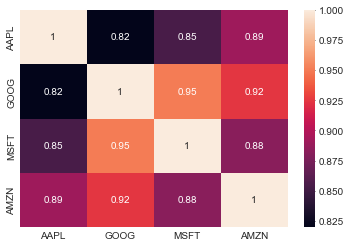

In [106]:
#Correlation between these stock
df_closing=pd.concat([AAPL['Adj Close'],GOOG['Adj Close'],MSFT['Adj Close'],AMZN['Adj Close'],],axis=1)
df_closing.columns = ["AAPL", "GOOG", "MSFT", "AMZN"]
# Calculate the correlation matrix
corr = df_closing.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr, annot=True)

In [107]:
#Machine Learning techniques
#Get bigger dataset
#list of comapanies included
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
#setting daytime
end = datetime.now()
start = datetime(end.year - 10, end.month, end.day)
for stock in tech_list:
    globals()[stock]=yf.download(stock,start,end)
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df= pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-01-06 00:00:00-05:00,83.029999,86.400002,81.430000,86.080002,86.080002,83219100,AMAZON
2023-01-09 00:00:00-05:00,87.459999,89.480003,87.080002,87.360001,87.360001,65266100,AMAZON
2023-01-10 00:00:00-05:00,87.570000,90.190002,87.290001,89.870003,89.870003,67756600,AMAZON
2023-01-11 00:00:00-05:00,90.930000,95.260002,90.930000,95.089996,95.089996,103126200,AMAZON
2023-01-12 00:00:00-05:00,96.930000,97.190002,93.500000,95.269997,95.269997,85254800,AMAZON
2023-01-13 00:00:00-05:00,94.180000,98.370003,94.120003,98.120003,98.120003,85413600,AMAZON
2023-01-17 00:00:00-05:00,98.680000,98.889999,95.730003,96.050003,96.050003,72755000,AMAZON
2023-01-18 00:00:00-05:00,97.250000,99.320000,95.379997,95.459999,95.459999,79570400,AMAZON
2023-01-19 00:00:00-05:00,94.739998,95.440002,92.860001,93.680000,93.680000,69002700,AMAZON


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10072 entries, 2013-01-22 00:00:00-05:00 to 2023-01-20 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          10072 non-null  float64
 1   High          10072 non-null  float64
 2   Low           10072 non-null  float64
 3   Close         10072 non-null  float64
 4   Adj Close     10072 non-null  float64
 5   Volume        10072 non-null  int64  
 6   company_name  10072 non-null  object 
dtypes: float64(5), int64(1), object(1)
memory usage: 629.5+ KB


In [109]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create lag features
AAPL["Adj Close Lag 1"] = AAPL["Adj Close"].shift(1)
AAPL["Adj Close Lag 2"] = AAPL["Adj Close"].shift(2)
AAPL["Adj Close Lag 3"] = AAPL["Adj Close"].shift(3)
AAPL["Adj Close Lag 4"] = AAPL["Adj Close"].shift(4)
AAPL["Adj Close Lag 5"] = AAPL["Adj Close"].shift(5)

AAPL=AAPL.dropna()

# Define the features and target
X = AAPL[["Adj Close Lag 1", "Adj Close Lag 2", "Adj Close Lag 3", "Adj Close Lag 4", "Adj Close Lag 5"]]
y = AAPL["Adj Close"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2.6884843268759058


In [110]:
#Predict APPl price next day
# Get the last 5 rows of the dataframe
last_5_days = AAPL.tail(5)

# Get the last 5 days of "Adj Close" prices
last_5_adj_close = [last_5_days['Adj Close'],last_5_days['Adj Close Lag 1'],last_5_days['Adj Close Lag 2'],last_5_days['Adj Close Lag 3'],last_5_days['Adj Close Lag 4']]
# Use the model to predict the next day's "Adj Close" price
next_day_prediction = model.predict(last_5_adj_close)

print("Predicted next day's Adj Close price: ", next_day_prediction[0])


Predicted next day's Adj Close price:  134.91586247992018


D:\Users\Dat Truong\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [114]:
# Predicting next 30 days Apple stock price
next_30_days=np.empty((30,5))
next_30_days[0]=model.predict(last_5_adj_close)
last_5_adj_close2=[model.predict(last_5_adj_close),last_5_days['Adj Close'],last_5_days['Adj Close Lag 1'],last_5_days['Adj Close Lag 2'],last_5_days['Adj Close Lag 3']]
next_30_days[1]=model.predict(last_5_adj_close2)
last_5_adj_close3=[model.predict(last_5_adj_close2),model.predict(last_5_adj_close),last_5_days['Adj Close'],last_5_days['Adj Close Lag 1'],last_5_days['Adj Close Lag 2']]
next_30_days[2]=model.predict(last_5_adj_close3)
last_5_adj_close4=[model.predict(last_5_adj_close3),model.predict(last_5_adj_close2),model.predict(last_5_adj_close),last_5_days['Adj Close'],last_5_days['Adj Close Lag 1']]
next_30_days[3]=model.predict(last_5_adj_close4)
last_5_adj_close5=[model.predict(last_5_adj_close4),model.predict(last_5_adj_close3),model.predict(last_5_adj_close2),model.predict(last_5_adj_close),last_5_days['Adj Close']]
next_30_days[4]=model.predict(last_5_adj_close5)
for i in range (5,30,1):
    next_30_days[i]=model.predict([next_30_days[i-1],next_30_days[i-2],next_30_days[i-3],next_30_days[i-4],next_30_days[i-5]])

next_30_days_2= model.predict(next_30_days)
adj_close_30= np.empty(30)
adj_close_30_2= np.empty(30)
for i in range (0,30,1):
    adj_close_30[i]=next_30_days[i][0]
    adj_close_30_2[i]=next_30_days_2[i][0]
print(adj_close_30)



D:\Users\Dat Truong\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\Users\Dat Truong\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\Users\Dat Truong\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\Users\Dat Truong\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\Users\Dat Truong\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\Users\Dat Truong\anaconda3\lib\site-packages\sklearn\base.py:4

IndexError: invalid index to scalar variable.

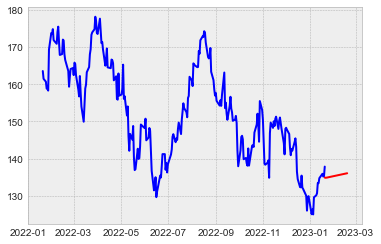

In [116]:
#Ploting
# Get the last year's data
last_year = AAPL[-252:]

# Get the last year's "Adj Close" prices
last_year_adj_close = last_year["Adj Close"]

# Get the last date in the historical data
last_date = last_year.index[-1]

# Create a list of dates starting from the last date in the historical data
date_list = pd.date_range(start=last_date, periods=30, freq='D')

# Plot the last year's "Adj Close" prices
plt.plot(last_year_adj_close, label="Last Year's Adj Close", color='blue')

# Plot the predicted "Adj Close" values for the next month
plt.plot(date_list, adj_close_30, label="Predicted Adj Close", color='red')
